
===Task===

Your work: Let's modify the above scratch code:

2. Modify so it print out the total within-cluster variation. 

3. Then try to run several k and identify which k is best.

4. Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.

5. Put everything into a class

In [1]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import pairwise_distances
from time import time
import numpy as np
import random
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)


In [2]:
class K_means:
    def __init__(self,k,batch_size = 100, max_iter = 100):
        self.k = k
        self.batch_size = batch_size
        self.max_iter = max_iter

    
    
    def fit(self, X, show_plot = False):
        m, n = X.shape
        random.seed(142)
        i = random.sample(range(m), self.k)
        self.centers = X[i]

        for iter_ in range(self.max_iter):
            
            #Using mini batch
            rnd = random.randint(0,m-self.batch_size) # m minus batch_size so that the batch size can be maintained 
            X_batch = X[rnd:rnd+self.batch_size] #Creation of the batch

            
            self.labels = np.argmin(pairwise_distances(X_batch, self.centers),axis = 1)
            
            new_centers = np.ones((self.k,n))    
            for i in range(k):
                new_centers[i] = X_batch[self.labels == i].mean(axis = 0)
            
            if show_plot:               
                if (iter_ % 10 == 0):
                    pred = pairwise_distances_argmin(X, new_centers)
                    plt.figure(figsize=(5, 2))
                    plt.title(f"Iteration: {iter_}")
                    plt.scatter(X[:, 0], X[:, 1], c=pred)
                    plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100,marker = '*', c="black", alpha=0.6)
            

            if(np.allclose(self.centers, new_centers, rtol=0.05)):
                break
            else:
                self.centers = new_centers
                
        #For X not X_train    
        self.labels = pairwise_distances_argmin(X, self.centers)
                    
        #print (self.centers )
                
    def variation(self,X, print_value = False):
        tot_var_score = 0
        #print(self.labels)
        for i in range(self.k):
            tot_var_score += ((X[self.labels==i] - self.centers[i])**2).sum()
            
        if (print_value == True):
            print ("total variation score is ", tot_var_score)
            print ("total variation score is ", self.centers)
            
        
        return tot_var_score , self.centers


    def predict(self, X):
        label = np.argmin(pairwise_distances(X, self.centers),axis = 1)
        return label



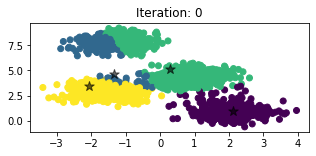

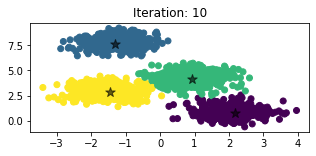

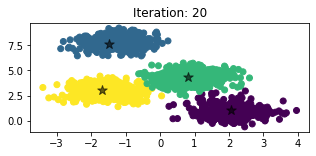

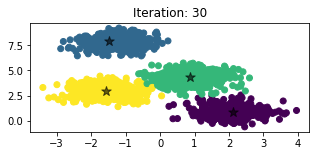

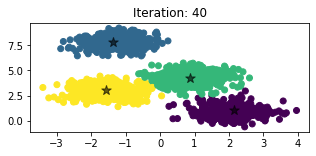

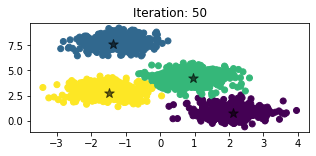

In [3]:
k = 4
model = K_means(k,)
model.fit(X, show_plot = True)

In [4]:
for k in range(2, 10):
    print(f"=====k = {k}")
    start = time()
    model = K_means(k)
    model.fit(X)
    preds = model.predict(X)
    variation, new_centers = model.variation(X)
    print("Variation score is ",variation )
    print(f"Fit and predict time {time() - start}")

=====k = 2
Variation score is  7087.928785404225
Fit and predict time 0.04197430610656738
=====k = 3
Variation score is  2542.0332576849573
Fit and predict time 0.032978057861328125
=====k = 4
Variation score is  1018.8154783862376
Fit and predict time 0.023984909057617188
=====k = 5
Variation score is  941.2251646643346
Fit and predict time 0.049968719482421875
=====k = 6
Variation score is  878.4553466353286
Fit and predict time 0.06196475028991699
=====k = 7
Variation score is  790.6950500595242
Fit and predict time 0.07095503807067871
=====k = 8
Variation score is  703.1389346174419
Fit and predict time 0.14591217041015625
=====k = 9
Variation score is  687.9137390420349
Fit and predict time 0.09294295310974121


Text(0.5, 1.0, 'Elbow curve')

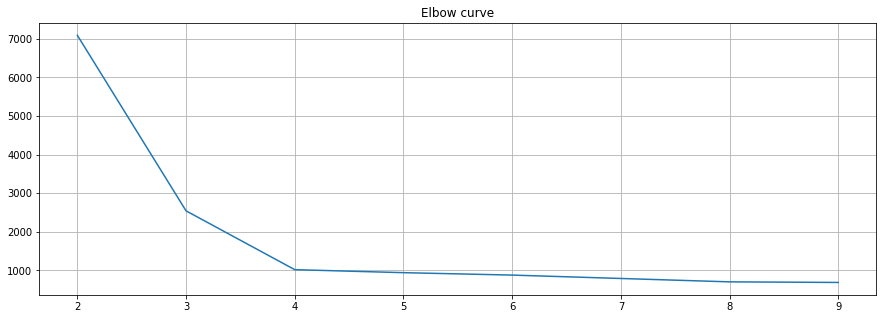

In [5]:
rng = np.random.RandomState(42)
ssd = []

l = 2
h = 10
for k in range(l, h):
    kmeans = K_means(k)
    kmeans.fit(X)
    var,_ = kmeans.variation(X)
    ssd.append(var)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(l,h),ssd)
plt.xticks(range(l, h))
plt.grid(True)
plt.title('Elbow curve')

It looks like the elbow is at cluster 4. After that the variation does not decrease too much. So our best cluster would be cluster 4.